### **Install Required Libraries and Import Libraries**

In [55]:
# Required Libraries
!apt-get install -y python-rdkit librdkit1 rdkit-data
!pip install rdkit
import pandas as pd
import itertools
from io import BytesIO
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display, HTML
import base64
import ast


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-rdkit


### **Define and Display Catalyst Structures**


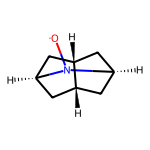
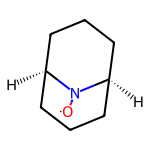
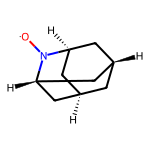
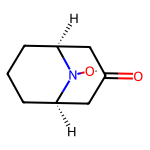
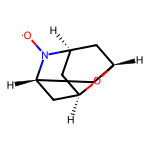
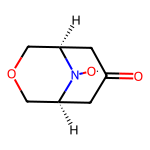
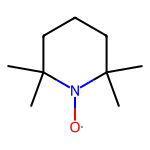
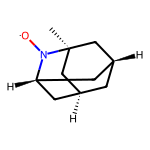


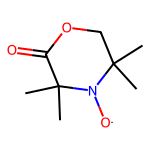
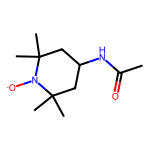
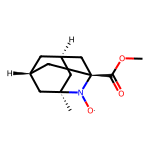
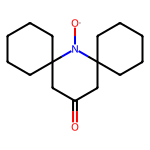
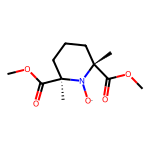
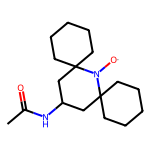
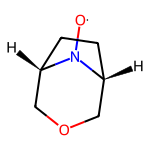
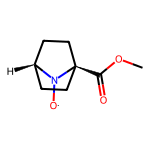


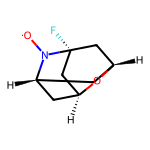
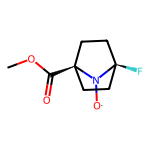
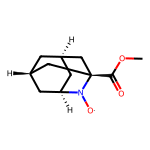
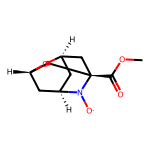
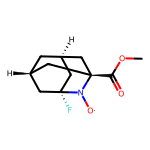
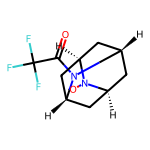
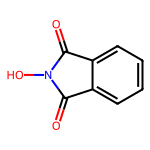

In [58]:
# List of catalyst SMILES strings
catalyst_smiles_list = [
    "[O]N1[C@@H]2C[C@@H]3C[C@H]1C[C@@H]3C2",
    "[O]N1[C@@H]2CCC[C@H]1CCC2",
    "[O]N1[C@@H]2C[C@@H]3C[C@H]1C[C@@H](C3)C2",
    "O=C1C[C@@H]2N([O])[C@H](C1)CCC2",
    "[O]N1[C@@H]2C[C@@H]3C[C@H]1C[C@@H](O3)C2",
    "O=C1C[C@@H]2N([O])[C@H](C1)COC2",
    "[O]N1C(C)(C)CCCC1(C)C",
    "[O]N1[C@]2(C)C[C@@H]3C[C@H]1C[C@@H](C3)C2",
    "[O]N(C1(C)C)C(C)(C)COC1=O",
    "[O]N1C(C)(C)CC(NC(C)=O)CC1(C)C",
    "[O]N1[C@]2(C)C[C@@H]3C[C@@]1(C(OC)=O)C[C@@H](C3)C2",
    "[O]N(C1(CCCCC1)C2)C3(CCCCC3)CC2=O",
    "[O]N1[C@@](C)(C(OC)=O)CCC[C@@]1(C(OC)=O)C",
    "[O]N1C2(CCCCC2)CC(NC(C)=O)CC13CCCCC3",
    "[O]N1[C@@H]2COC[C@H]1CC2",
    "[O]N1[C@]2(C(OC)=O)CC[C@H]1CC2",
    "[O]N1[C@]2(F)C[C@@H]3C[C@H]1C[C@@H](O3)C2",
    "[O]N1[C@]2(F)CC[C@@]1(C(OC)=O)CC2",
    "[O]N1[C@@H]2C[C@@H]3C[C@@]1(C(OC)=O)C[C@@H](C3)C2",
    "[O]N1[C@@H]2C[C@@H]3C[C@@]1(C(OC)=O)C[C@@H](O3)C2",
    "[O]N1[C@]2(F)C[C@@H]3C[C@@]1(C(OC)=O)C[C@@H](C3)C2",
    "[O]N1[C@@H]2C[C@@H]3C[C@H]1C[C@@H](N3C(C(F)(F)F)=O)C2",
    "O=C1N(O)C(C2=CC=CC=C21)=O"
]

# Import necessary libraries
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display, HTML
from io import BytesIO
import base64

# Create RDKit molecule objects from SMILES strings
catalyst_molecules = [Chem.MolFromSmiles(smiles) for smiles in catalyst_smiles_list]

# Function to display catalysts with labels in rows of 8
def display_catalysts(molecules):
    num_per_row = 8
    rows = [molecules[i:i + num_per_row] for i in range(0, len(molecules), num_per_row)]

    for row_index, row in enumerate(rows):
        # Create a list to store HTML for images and labels
        img_html = []
        for i, mol in enumerate(row):
            # Correct label for each molecule in a sequential manner
            label = f"A{row_index * num_per_row + (i + 1)}"
            img = Draw.MolToImage(mol, size=(150, 150))
            img_buffer = BytesIO()
            img.save(img_buffer, format="PNG")
            img_base64 = base64.b64encode(img_buffer.getvalue()).decode("utf-8")
            img_html.append(f"<div style='display:inline-block; margin:10px; text-align:center;'>"
                            f"<b>{label}</b><br>"
                            f"<img src='data:image/png;base64,{img_base64}' width='150' height='150'></div>")
        # Join the images in a row and display
        display(HTML("".join(img_html)))

# Display the catalysts
display_catalysts(catalyst_molecules)





### **Define Solvents and Acid Conditions**




In [59]:
# Define solvents and acid conditions
solvents = ["DCE", "MeCN"]
acid_conditions = ["no acid", "HNTf2"]


### **Generate Reaction Conditions**


In [60]:
# Generate all combinations of catalysts, solvents, and acid conditions
reaction_conditions = [{
    "Label": str(i + 1),
    "Catalyst": catalyst,
    "Solvent": solvent,
    "Acid": acid_condition
} for i, (solvent, acid_condition, catalyst) in enumerate(itertools.product(solvents, acid_conditions, catalyst_molecules))]

### **Function to Display Selected Molecules**




In [61]:
# Function to display selected molecules in an HTML table
def display_selected_molecules(molecule_list, selected_labels, additional_series):
    # Create an HTML table header
    table_html = '<table style="border-collapse: collapse; width: auto;"><tr>'

    for label in selected_labels:
        entry = next((entry for entry in molecule_list if entry['Label'] == str(label)), None)
        if entry:
            img_buffer = BytesIO()
            # Convert the RDKit molecule to an image
            img = Draw.MolToImage(entry['Catalyst'], size=(150, 150))
            img.save(img_buffer, format="PNG")
            img_base64 = base64.b64encode(img_buffer.getvalue()).decode("utf-8")

            # Create a table cell with label, molecule image, solvent, and acid
            table_html += f'''
            <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">
            <b>Label:</b> {entry['Label']}<br>
            <img src="data:image/png;base64,{img_base64}" alt="molecule" /><br>
            <b>Solvent:</b> {entry['Solvent']}<br>
            <b>Acid:</b> {entry['Acid']}</td>'''

    # Add additional series data in the last cell
    table_html += f'''
    <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">
    {additional_series.round(0).to_frame().to_html(classes="dataframe", header=False, index=False)}
    </td>'''

    table_html += '</tr></table>'

    # Display the HTML table
    display(HTML(table_html))


### **Load and Filter HTE Data**

In [62]:
# Load HTE data from Excel
try:
    df = pd.read_excel('HTE Data.xlsx', engine='openpyxl', header=0, index_col=0)
except FileNotFoundError:
    print("Error: The file 'HTE Data.xlsx' was not found.")
    raise

# Filter out columns with an average yield less than 5
df = df.loc[:, df.mean() >= 5]

### **Generate Combinations and Calculate Yields**

In [64]:
# Generate combinations of columns and calculate the best yield for each substrate
n = 3  # Number of columns to combine
m = 1  # m = 1 only includes the highest yield for each entry (maximal peforming combination); m =2 uses the two highest yields in the analysis (robust combination); results only differ slightly between either parameter choice
column_combinations = itertools.combinations(df.columns, n)
results_df = pd.DataFrame({
    str(cols): df[list(cols)].apply(lambda row: sum(row.nlargest(2)), axis=1)
    for cols in column_combinations
})


### **Rank Combinations and Save Results**

In [65]:
# Rank the combinations based on total yield and save the top results
top_conditions = results_df.sum().sort_values(ascending=False).head(500)
top_conditions.to_csv('Ranked combinations.csv', index=True)


### **Display Top Conditions**


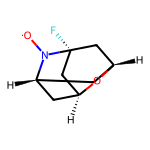
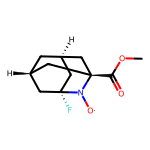
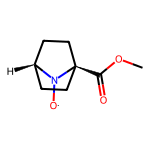


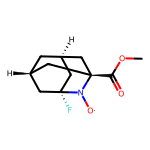
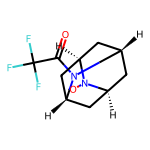
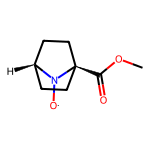


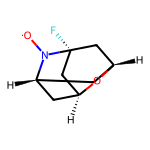
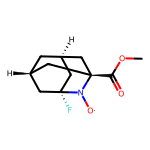
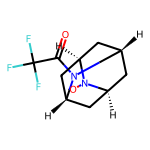


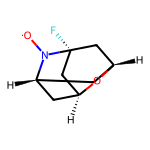
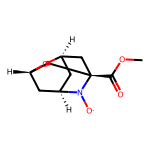
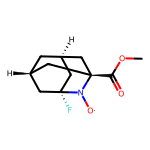


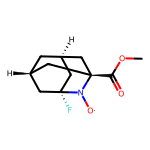
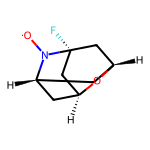
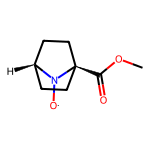


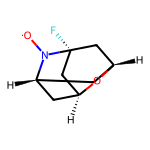
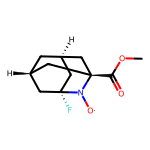
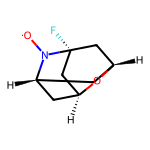


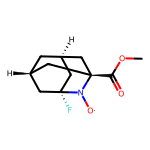
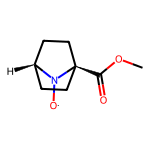
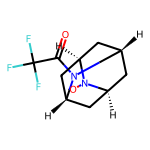


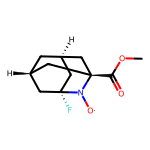
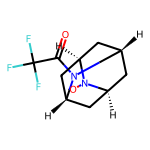
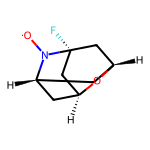


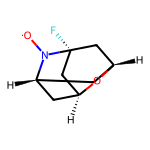
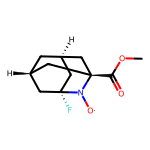
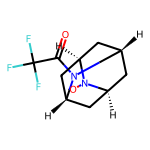


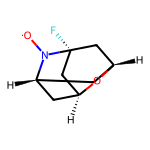
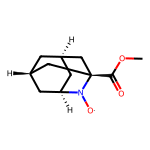
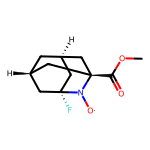


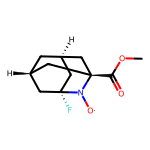
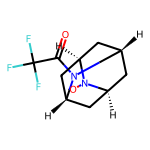
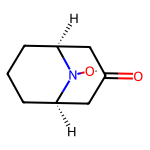


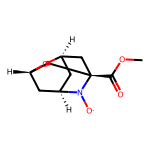
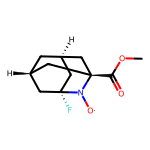
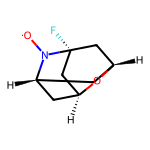


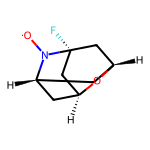
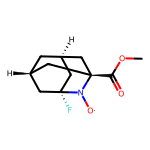
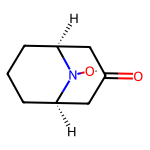


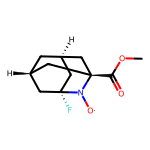
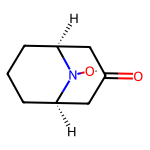
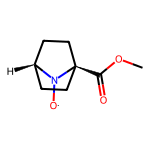


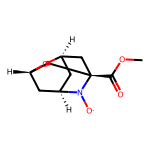
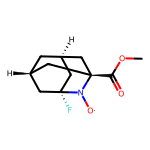
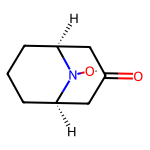


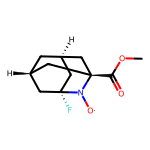
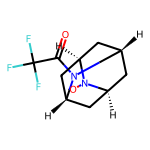
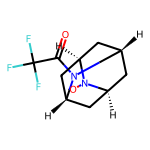


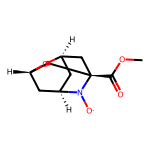
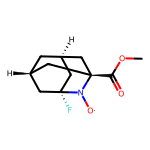
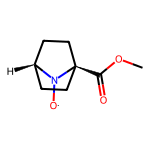


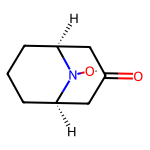
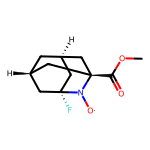
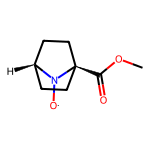


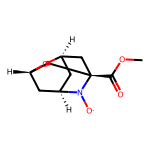
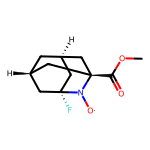
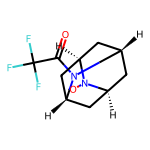


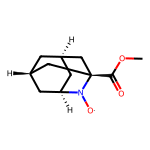
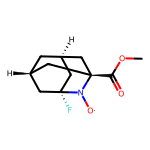
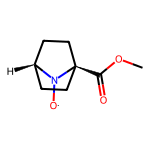


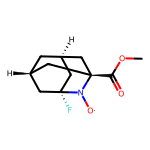
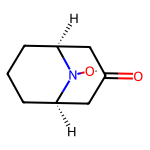
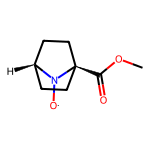


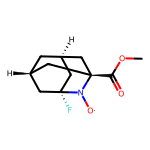
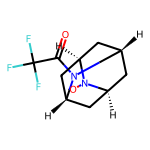
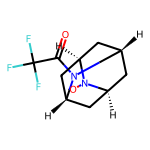


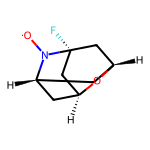
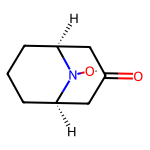
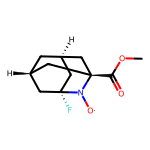


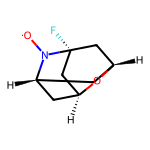
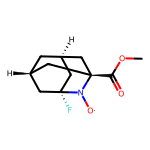
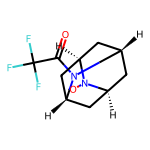


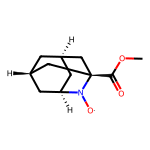
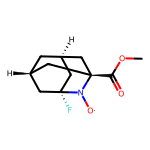
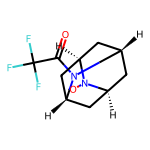


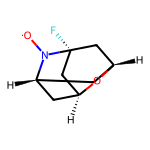
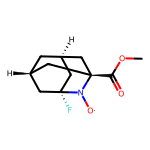
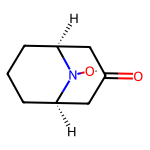


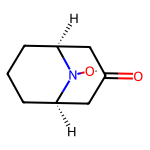
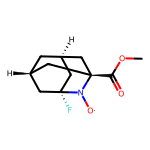
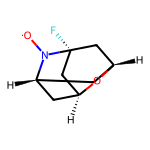


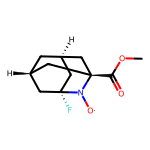
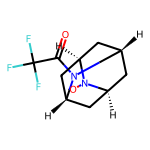
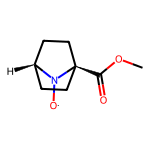


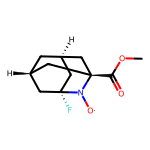
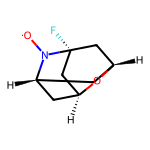
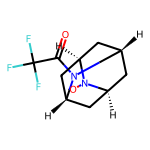


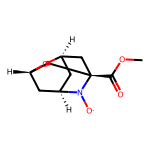
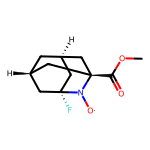
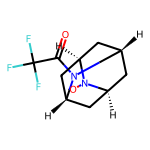


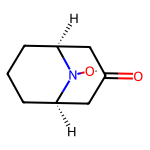
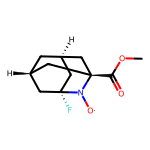
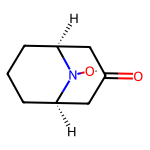


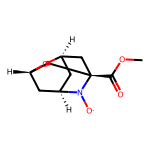
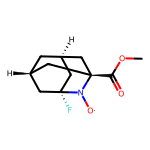
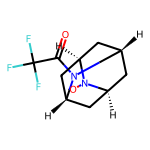


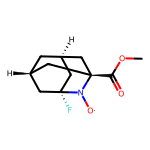
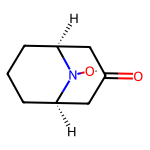
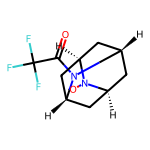


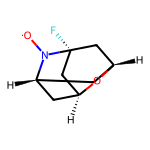
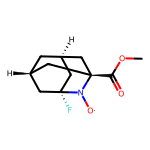
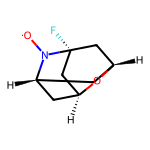


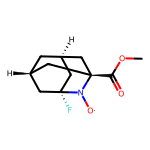
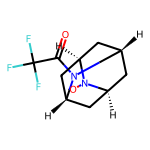
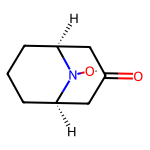


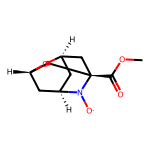
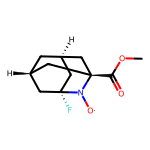
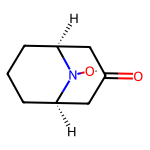


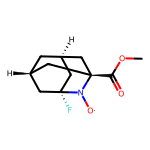
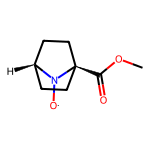
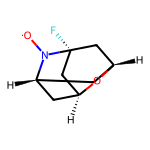


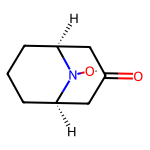
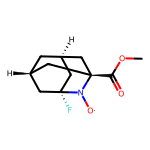
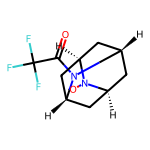


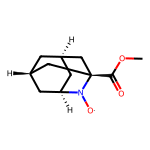
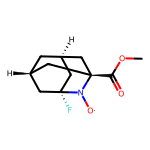
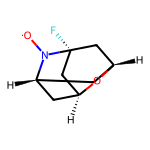


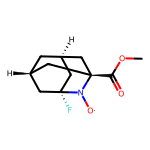
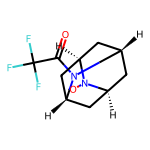
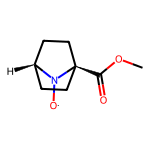


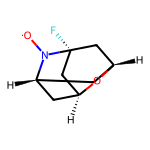
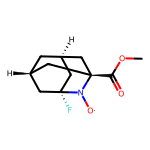
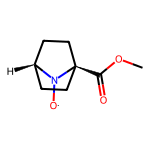


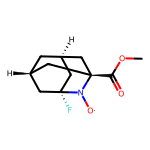
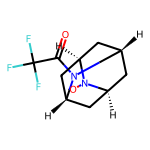
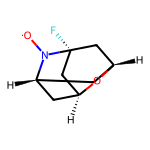


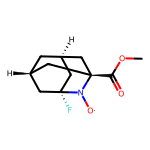
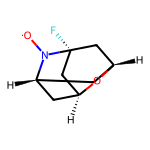
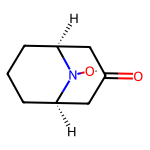


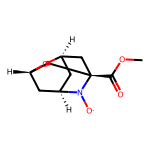
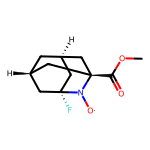
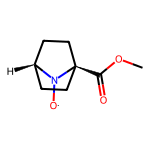


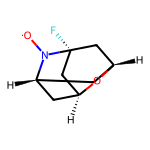
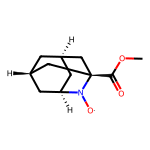
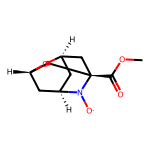


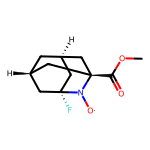
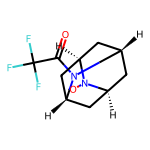
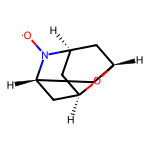


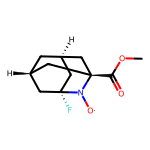
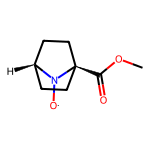
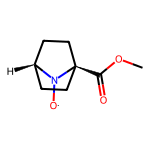


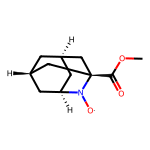
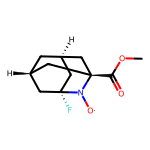
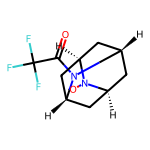


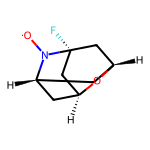
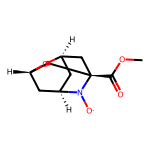
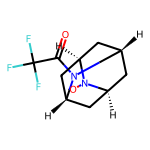


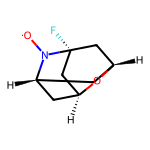
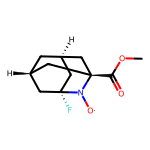
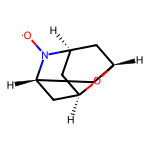

In [66]:
# Display top conditions with their corresponding molecules
for condition_index in top_conditions.index[:50]:  # Limit to the first 50 entries
    display_selected_molecules(reaction_conditions, ast.literal_eval(condition_index), results_df[condition_index])